In [102]:
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import control as ct
import control.matlab as ctm
import random as rr
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

### Funções auxiliares

In [103]:
def moving_average(v, jan):
    vet = []
    s = 0
    for i in range(0, jan):
        s += v[i]
        vet.append(s/(i+1))      
    for j in range(jan, len(v)):
        s -= v[j - jan]
        s += v[j]
        med = s / jan
        vet.append(med)
    return vet

In [104]:
def NMRSE(medidos, estimados):
    n = len(medidos)
    s = 0
    media = 0

    for i in range(0, n):
        d = medidos[i] - estimados[i]
        s += d * d
        media += medidos[i]
        
    media /= n
    sroot = math.sqrt(s / n)
    x = sroot / media
    return 1 - x

In [105]:
def rsquared(medidos, estimados):
    n = len(medidos)
    sq_erro = 0
    sq_total = 0
    x_aux = 0
    x1_aux = 0
    
    for i in range(0, n):
        d = medidos[i] - estimados[i]
        sq_erro += d * d
        x_aux += medidos[i] ** 2
        x1_aux += medidos[i]

    x1_aux *= x1_aux
    sq_total = x_aux - x1_aux / n
    
    return 1 - sq_erro / sq_total

In [106]:
def pearson(medidos, estimados):
    n = len(medidos)
    x_barra = 0
    y_barra = 0
    for i in range(0, n):
        x_barra += medidos[i]
        y_barra += estimados[i]
    x_barra /= n
    y_barra /= n

    s = 0
    sx = 0
    sy = 0
    for i in range(0, n):
        dx = medidos[i] - x_barra
        dy = estimados[i] - y_barra
        s += dx * dy
        sx += dx * dx
        sy += dy * dy
    sx = math.sqrt(sx)
    sy = math.sqrt(sy)
    
    return s / (sx * sy)

In [107]:
def acha_idx(val, vet):
    c = 0
    best = 1e9
    ans = 0
    for x in vet:
        diff = abs(x - val)
        if diff < best:
            best = diff
            ans = c
        c += 1
    return ans

In [108]:
def calcula_estatistica(medidos, estimados):
    print('NMRSE = ', NMRSE(medidos, estimados))
    print('r2 = ', rsquared(medidos, estimados))
    print('pearson = ', pearson(medidos, estimados))

In [109]:
ESTADO_PERMANENTE = .8
AMP_DEGRAU = .8
TEMPO_AMOSTRAGEM = .3
TEMPO_TOTAL = 15
TEMPO_SIMULACAO = TEMPO_TOTAL - 3

In [110]:
def plotarGraficos(temp, amp, useft, usefv, NAME, scX = None, scY = None, scL = None):
    plt.step(temp, amp, label=NAME)
    plt.step(useft, usefv, label='Coletado')
    plt.plot(temp, [AMP_DEGRAU] * len(temp), label='Entrada')
    if scX != None:
        for idx in range(len(scX)):
            plt.scatter(scX[idx], scY[idx], label=scL[idx], c='k')
    plt.title('Resultado simulacao modelo ' + NAME)
    plt.legend()
    plt.ylabel('Amplitude (V)')
    plt.xlabel('Tempo (s)')
    plt.grid(1)

In [111]:
def clean(num):
    num = re.sub(r'\n','', num)
    return float(num)

### Obtendo tempo de amostragem ideal

In [112]:
with open ('amostragem/valores.txt') as f:
    line = f.readlines()
    val_001 = list(map(clean, line))
len(val_001)

6668

In [113]:
with open ('amostragem/tempo.txt') as f:
    line = f.readlines()
    t_001 = list(map(clean, line))
len(t_001)

6668

In [114]:
val_001 = [val_001[i] for i in range(len(t_001)) if t_001[i] >= 3]
len(val_001)

4668

In [115]:
t_001 = [t_001[i] - 3 for i in range(len(t_001)) if t_001[i] >= 3]
len(t_001)

4668

In [116]:
# val_001 = moving_average(val_001, 15)

In [117]:
v95 = .95*AMP_DEGRAU
idx = acha_idx(v95, val_001)
t95 =  t_001[idx]
v95, idx, val_001[idx], t95

(0.76, 1272, 0.75758, 1.9080000000000004)

In [118]:
lower_t95 = t95/15
upper_t95 = t95/5
lower_t95, upper_t95

(0.12720000000000004, 0.38160000000000005)

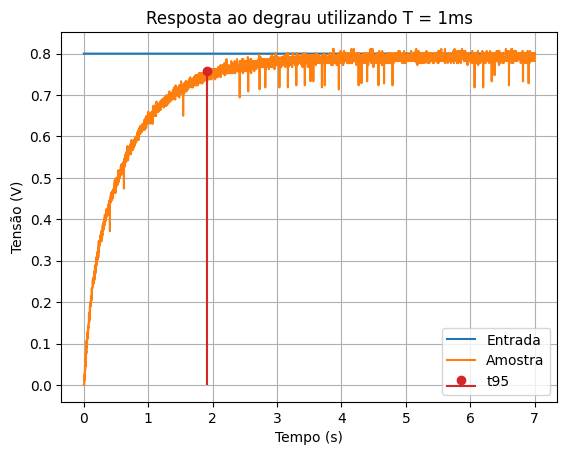

In [119]:
plt.plot(t_001, len(t_001)*[.8], label='Entrada')
plt.step(t_001, val_001, label='Amostra')
plt.stem(t_001[idx], val_001[idx], label='t95', linefmt='C3-')
plt.title('Resposta ao degrau utilizando T = 1ms')
plt.legend()
plt.ylabel("Tensão (V)")
plt.xlabel("Tempo (s)")
plt.grid()
plt.show()

### Leitura dos arquivos de entrada

In [120]:
t = [.3*x for x in range(0, round(15.3/.3), 1)]

In [121]:
with open ('amostragem/values_0.3s.txt') as f:
    line = f.readlines()
    val = list(map(clean, line[0].split(',')))
print(val)
len(val)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37634, 0.53275, 0.61095, 0.6696, 0.7087, 0.7478, 0.76246, 0.77224, 0.77713, 0.77224, 0.77224, 0.77713, 0.79179, 0.79179, 0.7869, 0.79179, 0.7869, 0.79179, 0.78201, 0.79179, 0.79668, 0.7869, 0.79668, 0.7869, 0.79179, 0.79179, 0.79668, 0.79668, 0.79179, 0.7869, 0.79179, 0.79668, 0.77713, 0.7869, 0.79668, 0.7869, 0.79668, 0.79179, 0.7869, 0.79179]


51

### Filtrando dados e selecionando a parte útil

In [122]:
janela = 3
usefv = [val[i] for i in range(len(t)) if t[i] >= 3]
useft = [i - 3. for i in t if i >= 3]
#usefv2 = np.convolve(val[10:], np.ones(janela)/janela, mode='valid')


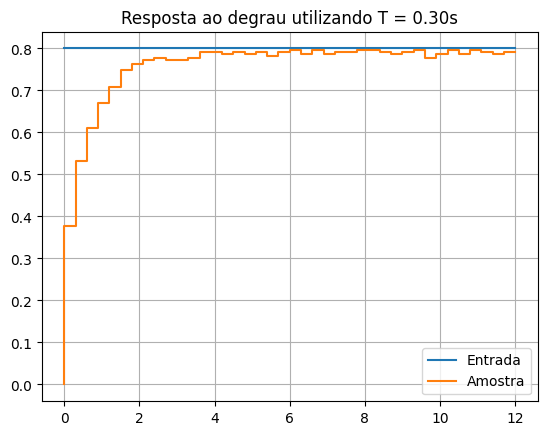

In [123]:
plt.plot(useft, len(useft)*[.8], label='Entrada')
plt.step(useft, usefv, label='Amostra')
plt.title('Resposta ao degrau utilizando T = 0.30s')
plt.legend()
plt.grid()
plt.show()

In [124]:
usefv

[0.0,
 0.37634,
 0.53275,
 0.61095,
 0.6696,
 0.7087,
 0.7478,
 0.76246,
 0.77224,
 0.77713,
 0.77224,
 0.77224,
 0.77713,
 0.79179,
 0.79179,
 0.7869,
 0.79179,
 0.7869,
 0.79179,
 0.78201,
 0.79179,
 0.79668,
 0.7869,
 0.79668,
 0.7869,
 0.79179,
 0.79179,
 0.79668,
 0.79668,
 0.79179,
 0.7869,
 0.79179,
 0.79668,
 0.77713,
 0.7869,
 0.79668,
 0.7869,
 0.79668,
 0.79179,
 0.7869,
 0.79179]

### Procurando melhor reta para o método de Ziegler-Nichols

In [125]:
def calca(y1, y2, x1, x2):
    return (y2 - y1)/(x2 - x1)

def calcb(y, a, x):
    return y - a * x

In [126]:
besta = -1
bestb = -1
bestc = 1
for i in range(1, len(usefv)): #no vetor de amplitudes, testar todas as amplitudes
    nowa = calca(usefv[0], usefv[i], useft[0], useft[i])# calcular coeficiente angular
    nowb = calcb(usefv[0], nowa, useft[0]) #calcular coeficiente linear
    if math.isclose(nowa, 0., abs_tol=1e-05):
        continue
    c = 0
    for j in range(1, len(useft)): # testar para todos os pontos da curva (eixo tempo)
         ponto_reta = nowa * useft[j] + nowb # calcular amplitude
         if math.isclose(ponto_reta, usefv[j], rel_tol=1e-05, abs_tol=1e-05): # se forem iguais 
             c += 1
    #print(i, nowa, nowb, c)
    if(c > bestc): #atualiza os valores se este é o melhor resultado até agora
        besta = nowa
        bestb = nowb
        bestc = c
print("melhor resultado ->","a =", round(besta, 3), "b =", round(bestb, 3), "c =", bestc)
# besta = 1.694
besta = usefv[1]/useft[1]
bestb = 0

melhor resultado -> a = -1 b = -1 c = 1


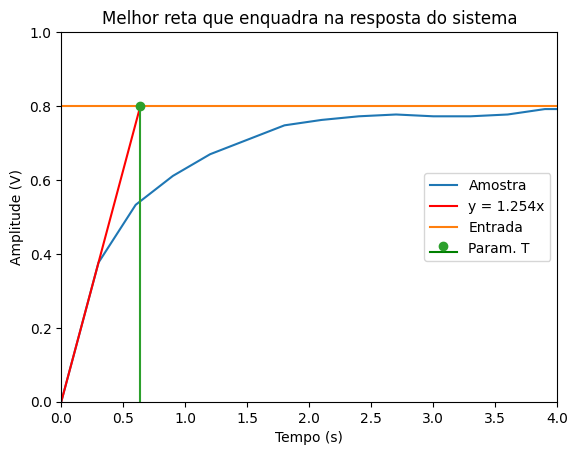

In [127]:
def vetor_reta(cang, coefb, vet_tempo):
    val1 = []
    t1 = []
    for i in range(0, len(vet_tempo)):
        temp = cang * vet_tempo[i] + coefb
        if temp > 0.8:
            break
        val1.append(temp)
        t1.append(vet_tempo[i])
    t1.append(0.8/cang)
    val1.append(0.8)    
    return t1, val1,

t_reta, v_reta = vetor_reta(besta, bestb, useft)

plt.plot(useft, usefv)
plt.plot(t_reta, v_reta, 'r')
plt.plot(useft, len(usefv) * [0.8])
plt.stem(t_reta[-1], v_reta[-1], linefmt='C2-', markerfmt='o', basefmt='g')
plt.legend(['Amostra','y = ' + str(round(besta,3)) + 'x','Entrada', 'Param. T'],loc='center right')
plt.ylabel('Amplitude (V)')
plt.xlabel('Tempo (s)')
plt.title("Melhor reta que enquadra na resposta do sistema")

plt.xlim(0, 4)
plt.ylim(0, 1)
plt.show()

In [128]:
usefv[1]/useft[1]

1.2544666666666675

In [129]:
valores_estimados = []

## Modelos de identificação de sistemas

### Ziegler-Nichols

In [130]:
NAME = 'Ziegler-Nichols'
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [131]:
T = .8 / besta
T
T_zig = T
T_zig

0.6377212095445604

In [132]:
num = [k]
den = [T, 1]

In [133]:
sys = ct.tf(num, den)
sys

TransferFunction(array([1.]), array([0.63772121, 1.        ]))

In [134]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.3752633]), array([ 1.       , -0.6247367]), 0.3)

In [135]:
num = [1]
den = [1,1]
sys = ct.tf(num, den)
test, y_test = ct.step_response(sys)
test[0], y_test[0], test[1], y_test[1]

(0.0, 0.0, 0.06977530584830441, 0.06739665311678013)

In [136]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

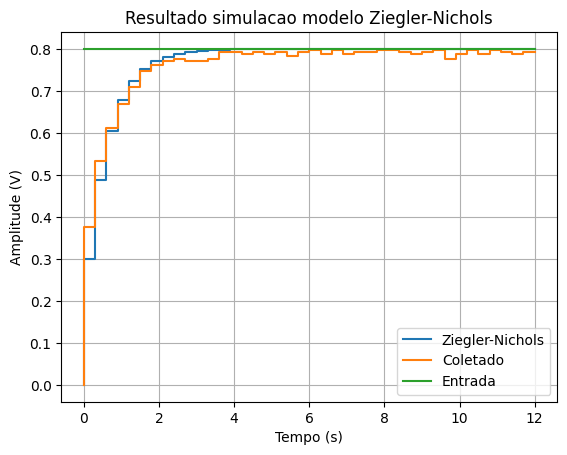

In [137]:
plotarGraficos(temp, amp, useft, usefv, NAME)

### Smith de primeira ordem

In [138]:
NAME = 'Smith de 1º ordem'
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [139]:
v1 = .28 * ESTADO_PERMANENTE
v2 = .632 * ESTADO_PERMANENTE
v1, v2

(0.22400000000000003, 0.5056)

In [140]:
k1 = acha_idx(v1, usefv)
k2 = acha_idx(v2, usefv)
k1,k2

(1, 2)

In [141]:
t1, t2 = useft[k1], useft[k2]
T = 1.5 * (t2 - t1)
Td = t2 - T
T

0.44999999999999973

In [142]:
num = [k]
den = [T, 1]
num, den

([1.0], [0.44999999999999973, 1])

In [143]:
sys = ct.tf(num, den)
sys

TransferFunction(array([1.]), array([0.45, 1.  ]))

In [144]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.48658288]), array([ 1.        , -0.51341712]), 0.3)

In [145]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

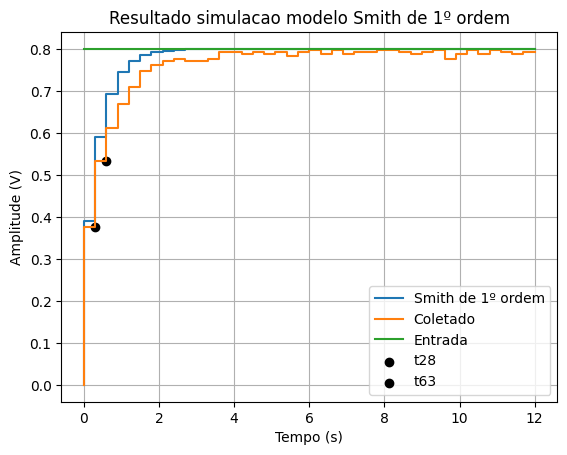

In [146]:
plotarGraficos(temp, amp, useft, usefv, NAME, [useft[k1], useft[k2]], [usefv[k1], usefv[k2]], ['t28', 't63'])

### Sundaresan-Krishnaswamy:

In [147]:
NAME = 'Sundaresan-Krishnaswamy'
v1 = .353 * ESTADO_PERMANENTE
v2 = .85 * ESTADO_PERMANENTE

In [148]:
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [149]:
k1 = acha_idx(v1, usefv)
k2 = acha_idx(v2, usefv)

In [150]:
t1, t2 = useft[k1], useft[k2]
T = .67 * (t2 - t1)
Td = 1.3 * t1 - .29 * t2
T, Td, t1, t2

(0.6030000000000003,
 0.04199999999999976,
 0.2999999999999998,
 1.2000000000000002)

In [151]:
num = [k]
den = [T, 1]
num, den

([1.0], [0.6030000000000003, 1])

In [152]:
sys = ct.tf(num, den)
best_model = [[num],[den]]
sys

TransferFunction(array([1.]), array([0.603, 1.   ]))

In [ ]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.39195868]), array([ 1.        , -0.60804132]), 0.3)

In [ ]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

[0.         0.31356694 0.5042286  0.62015877 0.6906491  0.73351013
 0.75957141 0.77541775 0.78505298 0.79091159 0.79447387 0.79663989
 0.79795691 0.79875772 0.79924464 0.79954071 0.79972073 0.79983019
 0.79989675 0.79993722 0.79996183 0.79997679 0.79998589 0.79999142
 0.79999478 0.79999683 0.79999807 0.79999883 0.79999929 0.79999957
 0.79999974 0.79999984 0.7999999  0.79999994 0.79999996 0.79999998
 0.79999999 0.79999999 0.8        0.8        0.8       ]


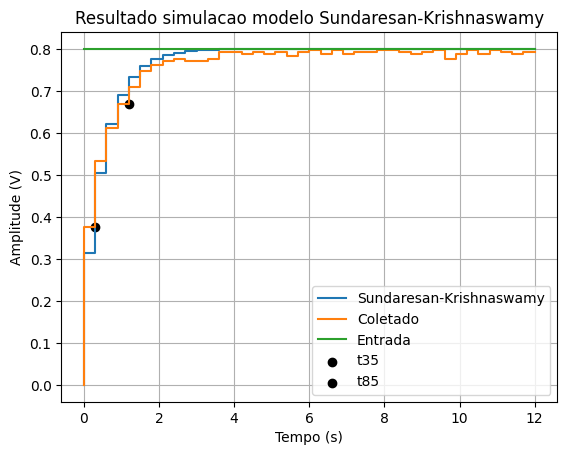

In [ ]:
plotarGraficos(temp, amp, useft, usefv, NAME, [useft[k1], useft[k2]], [usefv[k1], usefv[k2]], ['t35', 't85'])

### Broida

In [ ]:
NAME = 'Broida'
v1 = .28 * ESTADO_PERMANENTE
v2 = .4 * ESTADO_PERMANENTE

In [ ]:
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [ ]:
k1 = acha_idx(v1, usefv)
k2 = acha_idx(v2, usefv)
k2 += 1

In [ ]:
t1, t2 = useft[k1], useft[k2]
T = 5.5 * (t2 - t1)
Td = t2 - T
T,t1,t2

(1.649999999999999, 0.2999999999999998, 0.5999999999999996)

In [ ]:
num = [k]
den = [T, 1]
num, den

([1.0], [1.649999999999999, 1])

In [ ]:
sys = ct.tf(num, den)
sys

TransferFunction(array([1.]), array([1.65, 1.  ]))

In [ ]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.16624708]), array([ 1.        , -0.83375292]), 0.3)

In [ ]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

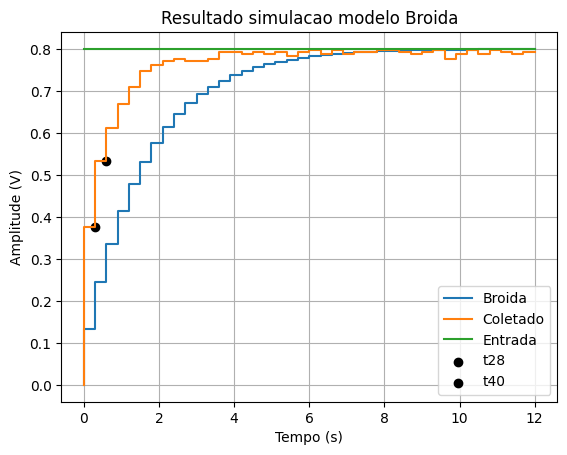

In [ ]:
plotarGraficos(temp, amp, useft, usefv, NAME, [useft[k1], useft[k2]], [usefv[k1], usefv[k2]], ['t28', 't40'])

### Smith de segunda ordem

In [ ]:
NAME = 'Smith de 2º ordem'
v1 = .2 * ESTADO_PERMANENTE
v2 = .6 * ESTADO_PERMANENTE
v1, v2

(0.16000000000000003, 0.48)

In [ ]:
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [ ]:
k1 = acha_idx(v1, usefv)
k2 = acha_idx(v2, usefv)
k1, k2

(0, 2)

In [ ]:
t20, t60 = useft[k1], useft[k2]
t20, t60

(0.0, 0.5999999999999996)

In [ ]:
point = t20/t60
point

0.0

In [ ]:
csi = .4
tau = 0.39999999999999997

num = [k]
den = [tau, 2 * csi * tau, 1]

In [ ]:
sys = ct.tf(num, den)
sys

TransferFunction(array([1.]), array([0.4 , 0.32, 1.  ]))

In [ ]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.10211082, 0.09420645]), array([ 1.        , -1.59031059,  0.78662786]), 0.3)

In [ ]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

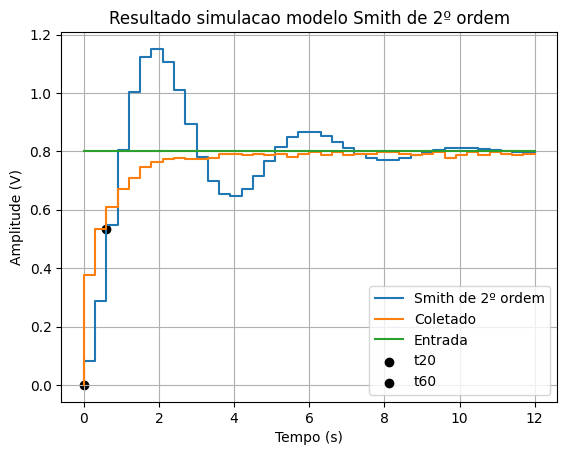

In [ ]:
plotarGraficos(temp, amp, useft, usefv, NAME, [useft[k1], useft[k2]], [usefv[k1], usefv[k2]], ['t20', 't60'])

### Harriot

In [ ]:
ESTADO_PERMANENTE = .8
AMP_DEGRAU = .8
v73 = .73 * ESTADO_PERMANENTE

In [ ]:
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
NAME = 'Harriot'
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [ ]:
k73 = acha_idx(v73, usefv)
print("idx =", k73," busquei =", v73, "achei =", usefv[k73], "no tempo =", useft[k73])

idx = 3  busquei = 0.584 achei = 0.61095 no tempo = 0.8999999999999999


In [ ]:
t1 = useft[k73] / 2.6
t1

0.3461538461538461

In [ ]:
k1 = acha_idx(t1, useft)
print("idx =", k1," busquei =", t1, "achei =", useft[k1], "no valor =", usefv[k1])
y1 = usefv[k1]
y1

idx = 1  busquei = 0.3461538461538461 achei = 0.2999999999999998 no valor = 0.37634


0.37634

In [ ]:
ponto_h = y1/ESTADO_PERMANENTE
ponto_h

0.470425

Método fica por aqui porque o ponto nao existe no grafico

### Mollenkamp

In [ ]:
NAME = 'Mollenkamp'
v1 = .15 * ESTADO_PERMANENTE
v2 = .45 * ESTADO_PERMANENTE
v3 = .75 * ESTADO_PERMANENTE
v1, v2, v3

(0.12, 0.36000000000000004, 0.6000000000000001)

In [ ]:
dy = ESTADO_PERMANENTE
du = AMP_DEGRAU
k = dy / du
dy, du, k

(0.8, 0.8, 1.0)

In [ ]:
k1 = acha_idx(v1, usefv)
k2 = acha_idx(v2, usefv)
k3 = acha_idx(v3, usefv)

In [ ]:
t1 = useft[k1]
t2 = useft[k2]
t3 = useft[k3]
t1, t2, t3

(0.0, 0.2999999999999998, 0.8999999999999999)

In [ ]:
x = (t2 - t1) / (t3 - t1)
x

0.33333333333333315

In [ ]:
qsi = (0.0805 - 5.547 * ((0.475 - x)**2))/(x-0.356)

f2 = 0
if qsi < 1:
    f2 = (0.708) * (2.811)**qsi
else:
    f2 = 2.6 * qsi-0.6

wn = f2 / (t3 - t1)

In [ ]:
num = [k * wn * wn]
den = [1, 2 * qsi * wn, wn**2]

In [ ]:
sys = ct.tf(num, den)
sys

TransferFunction(array([10.64088119]), array([ 1.        ,  8.87231914, 10.64088119]))

In [ ]:
dsys = ctm.c2d(sys, TEMPO_AMOSTRAGEM, 'zoh')
dsys

TransferFunction(array([0.21943965, 0.0919468 ]), array([ 1.        , -0.75844326,  0.06982971]), 0.3)

In [ ]:
temp, amp = ct.step_response(dsys, TEMPO_SIMULACAO)
amp *= AMP_DEGRAU
valores_estimados.append(amp)

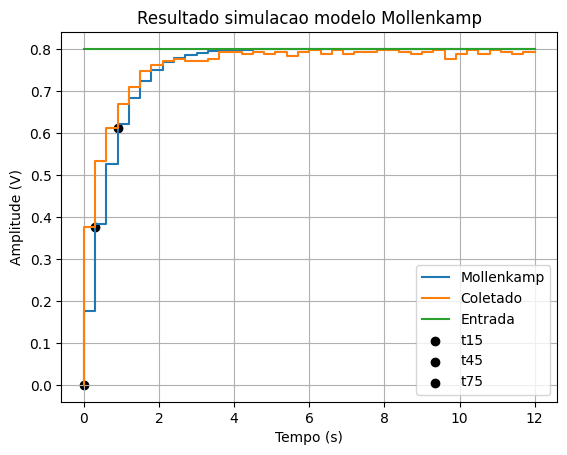

In [ ]:
plotarGraficos(temp, amp, useft, usefv, NAME, [useft[k1], useft[k2], useft[k3]], [usefv[k1], usefv[k2], usefv[k3]], ['t15', 't45', 't75'])

### **Estatística** 

In [ ]:
n = len(valores_estimados)
modelos = ['Ziegler-Nichols', 'Smith de primeira ordem', 'Sundaresan', 'Broida', 'Smith de segunda ordem', 'Mollenkamp']
for i in range(n):
    print(modelos[i])
    calcula_estatistica(usefv, valores_estimados[i])
    print()

Ziegler-Nichols
NMRSE =  0.9762138691066191
r2 =  0.9845100152476921
pearson =  0.9957061960856683

Smith de primeira ordem
NMRSE =  0.9649515981907704
r2 =  0.9663689970108218
pearson =  0.9911563628108624

Sundaresan
NMRSE =  0.9778610086110007
r2 =  0.9865810342608722
pearson =  0.9965632927333264

Broida
NMRSE =  0.8517469375804958
r2 =  0.3982574420976952
pearson =  0.8922280882093041

Smith de segunda ordem
NMRSE =  0.8095871113011989
r2 =  0.007350188053120377
pearson =  0.7851160427245054

Mollenkamp
NMRSE =  0.9414619630062765
r2 =  0.906183399730591
pearson =  0.9763690531784777



## **Sintonia do PID**


### Método de Ziegler

In [ ]:
def PID_Z_N_sintony(transfer_func,T,D,K):
  kp = 1.2*T/(K*D)
  ti = 2*D
  td = D/2
  return kp,ti,td

def PI_Z_N_sintony(transfer_func,T,D,K):
  kp = 0.9*T/(K*D)
  ti = 3.3*D
  return kp,ti

In [ ]:
kp,ti,td = PID_Z_N_sintony(best_model,T_zig,.3,1) ## PID
print(f"Para o PID, pelo método de Ziegler o kp vale {kp}, o ti é igual {ti}, e o td é {td} ")

Para o PID, pelo método de Ziegler o kp vale 2.5508848381782414, o ti é igual 0.6, e o td é 0.15 


In [ ]:
kp,ti = PI_Z_N_sintony(best_model,T_zig,.3,1) ## PID
print(f"Para o PI, pelo método de Ziegler o kp vale {kp}, o ti é igual {ti}")

Para o PI, pelo método de Ziegler o kp vale 1.913163628633681, o ti é igual 0.9899999999999999


In [ ]:
best_model

[[[1.0]], [[0.6030000000000003, 1]]]

## Método de CHR sem sobrevalor

In [ ]:
def PID_CHR_sintony(transfer_func,T,D,K):
  kp = 0.6*T/(K*D)
  ti = T
  td = D/2
  return kp,ti,td;

def PI_CHR_sintony(transfer_func,T,D,K):
  kp = 0.35*T/(K*D)
  ti = 1.16*D
  return kp,ti

In [ ]:
kp,ti,td = PID_CHR_sintony(best_model,T_zig,.3,1) ## PID
print(f"Para o PID, pelo método de CHR o kp vale {kp}, o ti é igual {ti}, e o td é {td} ")

Para o PID, pelo método de CHR o kp vale 1.2754424190891207, o ti é igual 0.6377212095445604, e o td é 0.15 


In [ ]:
kp,ti = PI_CHR_sintony(best_model,T_zig,.3,1) ## PID
print(f"Para o PID, pelo método de CHR o kp vale {kp}, o ti é igual {ti}, e o td é {td} ")

Para o PID, pelo método de CHR o kp vale 0.7440080778019871, o ti é igual 0.348, e o td é 0.15 


## Método CHR 20% sobresinal

In [ ]:
def PID_CHR_sintony_20(transfer_func,T,D,K):
  kp = 0.95*T/(K*D)
  ti = 1.357*T
  td = 0.473*D
  return kp,ti,td;

def PI_CHR_sintony_20(transfer_func,T,D,K):
  kp = 0.6*T/(K*D)
  ti = D
  return kp,ti

In [ ]:
kp,ti,td = PID_CHR_sintony_20(best_model,T_zig,.3,1) ## PID
print(f"Para o PID, pelo método de CHR o kp vale {kp}, o ti é igual {ti}, e o td é {td} ")

Para o PID, pelo método de CHR o kp vale 2.019450496891108, o ti é igual 0.8653876813519684, e o td é 0.1419 


In [ ]:
kp,ti = PI_CHR_sintony_20(best_model,T_zig,.3,1) ## PID
print(f"Para o PID, pelo método de CHR o kp vale {kp}, o ti é igual {ti} ")

Para o PID, pelo método de CHR o kp vale 1.2754424190891207, o ti é igual 0.3 
